Num EBs:		 3485
Num EBs are SBs:	 515


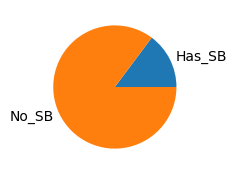

In [6]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))  # Jupyter 6
display(HTML("<style>.jp-Notebook { --jp-notebook-max-width: 98%; }</style>"))  # Jupyter 7


df = pd.read_csv("pht_vsx_eb_with_sb.csv", dtype={
    "GAIA_Source": "uint64",  # ensure it's large enough
    "NSS_Flags": "Int64",  # make it nullable int
    })
df["Period_Ratio_EB_SB"] = df["VSX_Period"] / df["NSS_Per"]
df["Period_Delta_EB_SB"] = np.abs(df["VSX_Period"] - df["NSS_Per"])

df["Has_SB"] = pd.notna(df["NSS_Per"])

df_m1 = df[df["Has_SB"]]  # those with SBs


print("Num EBs:\t\t", len(df))
print("Num EBs are SBs:\t", len(df_m1))

ax = plt.figure(figsize=(2, 2)).gca()
ax.pie(
    [ len(df_m1), len(df) - len(df_m1), ],
    labels=["Has_SB", "No_SB"],
    );

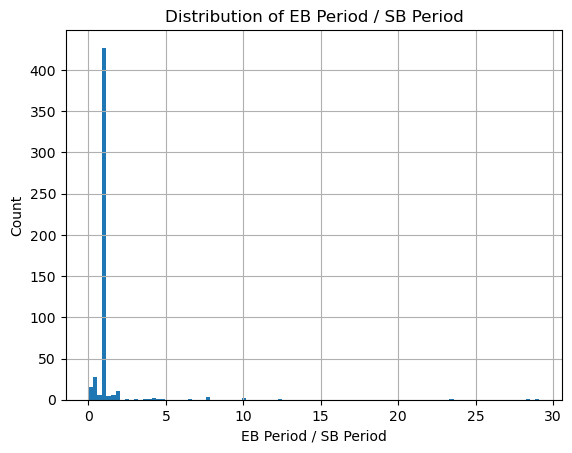

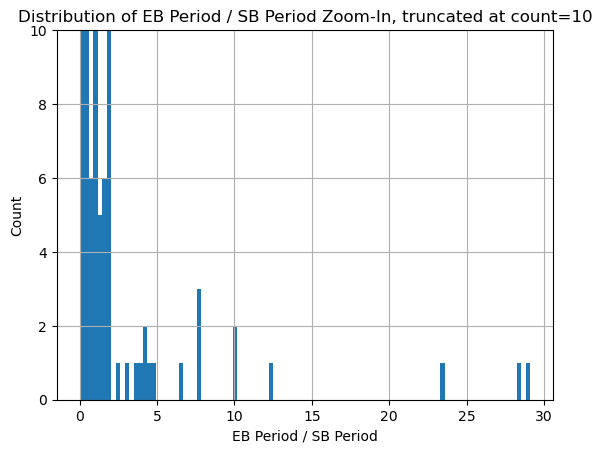

In [2]:
ax = df_m1["Period_Ratio_EB_SB"].hist(bins=100)
ax.set_title("Distribution of EB Period / SB Period");
ax.set_xlabel("EB Period / SB Period");
ax.set_ylabel("Count");
plt.show();

ax = df_m1["Period_Ratio_EB_SB"].hist(bins=100)
ax.set_ylim(0, 10);
ax.set_title("Distribution of EB Period / SB Period Zoom-In, truncated at count=10");
ax.set_xlabel("EB Period / SB Period");
ax.set_ylabel("Count");

## List of targets with significant difference in EB period and SB period

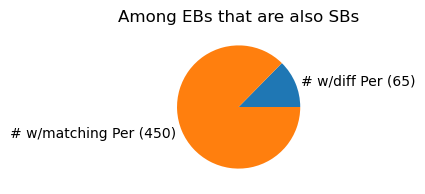

In [3]:
# now exclude those that closely match EB period (ratio ~1, ~0.5 ~2)

def not_in_range(df, column, range_min, range_max):
    return df[~((range_min < df[column]) & (df[column] < range_max))]


df_m2 = df_m1
df_m2 = not_in_range(df_m2, "Period_Ratio_EB_SB", 0.99, 1.01)
df_m2 = not_in_range(df_m2, "Period_Ratio_EB_SB", 0.495, 0.505)
df_m2 = not_in_range(df_m2, "Period_Ratio_EB_SB", 1.98, 2.02)
df_m2 = not_in_range(df_m2, "Period_Delta_EB_SB", 0.0, 0.1)  # also exclude those the absolute difference is small

df_m2.sort_values(by="Period_Ratio_EB_SB", inplace=True)

ax = plt.figure(figsize=(2, 2)).gca()
ax.pie(
    [ len(df_m2), len(df_m1) - len(df_m2), ],
    labels=[f"# w/diff Per ({len(df_m2)})", f"# w/matching Per ({len(df_m1) - len(df_m2)})"],
    );
ax.set_title("Among EBs that are also SBs");


## Multi-star system candidates

- targets with signfiicant difference in EB and SB periods

In [34]:
print("Num. of targets with significant difference in EB / SB periods:", len(df_m2))
with pd.option_context('display.max_rows', 999, 'display.max_columns', 99):
    display(df_m2[["tic_id",
       "best_subject_id",
       "num_sectors",  # a proxy only, as it's the num. of sectors with PHT eb tags, there could have more data in sectors not tagged.
       "GAIA_Source", "VSX_OID", "VSX_Type",
       "VSX_Period", "NSS_Per", "Period_Ratio_EB_SB",
       "GAIA_sepsi", "GAIA_RUWE", "GAIA_e_RV",
       "NSS_Vcm", "NSS_Flags",
       ]].reset_index(drop=True))
display(HTML(f"""The list in <a href="multi_star_candidates_by_eb_sb_period_diff.csv" target="_blank">csv file</a>"""));

Num. of targets with significant difference in EB / SB periods: 65


,tic_id,best_subject_id,num_sectors,GAIA_Source,VSX_OID,VSX_Type,VSX_Period,NSS_Per,Period_Ratio_EB_SB,GAIA_sepsi,GAIA_RUWE,GAIA_e_RV,NSS_Vcm,NSS_Flags
0,36883123,30149148,3,5173394868034819968,14160,EW,0.335270,1085.541825,0.000309,2593.7000,11.080,1.06,17.346373,0
1,57297550,46378386,2,1352346392464295168,15668,EW,0.382230,292.867149,0.001305,10.0350,0.938,5.15,-35.901714,8192
2,417497545,37872130,2,2171301960385231488,11457,EA/SD,4.758433,925.190009,0.005143,115.0600,2.154,7.49,-13.300365,0
3,440051305,38692422,1,385590588900489216,555463,EW,0.329674,63.305101,0.005208,6364.0000,15.197,0.86,-22.938943,0
4,231922417,30973102,4,5566728797637156352,79204,EA,0.687161,66.847929,0.010279,46.0760,1.595,11.08,21.449137,0
5,342645261,48938244,1,4525119960446646400,144349,EA,7.146150,361.592470,0.019763,55.3700,1.204,NaN,-14.378345,8388608
6,266769521,52579857,4,5134682575449622656,9125,EB,0.536169,25.676687,0.020882,11.4320,1.000,NaN,29.805092,8388608
7,273874851,37757104,2,2086448353089047808,162391,EA,2.045161,69.560975,0.029401,60.2470,1.289,25.59,-3.426411,8192
8,4713510,56971831,1,2930145543974217856,5271,EB/SD,0.624142,18.477825,0.033778,50.9680,1.427,1.57,108.109187,0
9,305633328,37861972,2,2192432168679252096,52116,EA,2.503500,61.837738,0.040485,7.6161,0.802,NaN,-19.300738,8388608


In [5]:
# save the results as csv
# df_m2.to_csv("multi_star_candidates_by_eb_sb_period_diff.csv", index=False)

## Eclipse Timing Variation (ETV) Analysis


In [59]:
df_etv = pd.read_csv("etv/etv_summary.csv", 
                     dtype={"num_sectors": "Int32"},  # make num_secors nullable int, to handle  missing value cases
                     converters={"has_etv": str}, # ensure blank value stays blank
                    )  
df_etv = pd.merge(df_etv, df_m2, left_on="tic", right_on="tic_id", )
df_etv.rename(columns={"period": "ETV_Period", "num_sectors_x": "num_sectors"}, inplace=True)

display_columns = ["tic", "has_etv", "comments", 
                   # "VSX_Type",
                   "ETV_Period",  "VSX_Period", "NSS_Per", "Period_Ratio_EB_SB", 
                   "num_sectors", "time_span"
                  ]
with pd.option_context('display.max_colwidth', None, 'display.max_rows', 999, 'display.max_columns', 99):
    display(df_etv[display_columns].style.format({
        "tic": lambda tic: f'<a target="_etv_report" href="etv/ETV_extraction_coshgauss_{tic}.ipynb">{tic}</a>',
        "time_span":  "{:.2f}",
        }))

,tic,has_etv,comments,ETV_Period,VSX_Period,NSS_Per,Period_Ratio_EB_SB,num_sectors,time_span
0,272650576,N?,Data possibly too sparse,16.256833,16.257000,4.649853,3.496240,16,1169.78
1,353894978,N,VSX Period to SB Period ~ 1:3.,3.341824,3.341815,10.275313,0.325228,28,1279.23
2,30034081,N,VSX Period to SB Period ~ 7:5 . Period used is ~2X of the VSX period,4.689246,2.344635,1.655498,1.416271,30,1797.24
3,420962954,,Likely to be too sparse (2 or 3 sectors) for ETV,nan,0.664660,0.997011,0.666653,,nan
4,382101519,N,included 7 sectors of 200s TESS-SPOC data to increase the time span,0.672261,1.344500,1.657316,0.811251,20,1145.86
